## 1. Importing the packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

np.random.seed(1)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Load the data

In [3]:
X_train = pd.read_csv("Water_Quality_train_x.csv")
X_test = pd.read_csv("Water_Quality_test_x.csv")
y_train = pd.read_csv("Water_Quality_train_y.csv")
y_test = pd.read_csv("Water_Quality_test_y.csv")

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2048, 9), (711, 9), (2048, 1), (711, 1))

## 3. Model the data

In [5]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

# Type 2 Error cost Error for this model. Type 2 error (false negative) would occur if the model fails to detect the presence of harmful contaminants when the water is actually contaminated. This could lead to exposure to harmful contaminants and potentially adverse health effects for individuals who consume the water. hence for the Hyperparameter tuning we will using Recall as the scoring metric.

### 3.1 Fit and test a Logistic Regression model

In [6]:
log_reg_model = LogisticRegression()#penalty='none'

In [7]:
_ = log_reg_model.fit(X_train, np.ravel(y_train))

In [8]:
model_preds = log_reg_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.58      0.39      0.46       124
           1       0.71      0.47      0.57       137
           2       0.80      0.71      0.75       231
           3       0.37      0.83      0.51        90
           4       0.79      0.78      0.78       129

    accuracy                           0.64       711
   macro avg       0.65      0.64      0.62       711
weighted avg       0.69      0.64      0.64       711



In [9]:
### Random search For the Logistic regression

In [10]:
score_measure = "recall"
kfolds = 10

param_grid = {
    "max_iter" : [100, 500, 1000, 5000],
    "solver" : ['liblinear', 'newton-cg', 'lbfgs'],
    "penalty" : ['l1','l2','elasticnet'],
    "warm_start" : [True, False],
    "C" :  [0.01, 0.1, 1, 10, 100]}

lm = LogisticRegression()
rand_search = RandomizedSearchCV(estimator = lm, param_distributions=param_grid, cv=kfolds, n_iter=200,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

In [11]:
_ = rand_search.fit(X_train, np.ravel(y_train))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [12]:

print(f"... with parameters: {rand_search.best_params_}")

bestmodel = rand_search.best_estimator_

... with parameters: {'warm_start': True, 'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': 10}


In [13]:
model_preds = bestmodel.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39       124
           1       0.70      0.38      0.49       137
           2       0.75      0.69      0.72       231
           3       0.33      0.80      0.47        90
           4       0.71      0.79      0.75       129

    accuracy                           0.59       711
   macro avg       0.62      0.59      0.56       711
weighted avg       0.65      0.59      0.59       711



In [14]:
### Grid Search log

In [15]:
score_measure = "recall"
kfolds = 4

param_grid = {
    "max_iter" : range(900,1100,5),
    "solver" : ['liblinear'],
    "penalty" : ['l2'],
    "warm_start" : [True],
    "C" : np.arange(8,12,1)}

lm = LogisticRegression()
GridSearch_log = GridSearchCV(estimator = lm, param_grid=param_grid, cv=kfolds,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

In [16]:
_ = GridSearch_log.fit(X_train, np.ravel(y_train))

print(f"... with parameters: {GridSearch_log.best_params_}")

bestmodel = GridSearch_log.best_estimator_

Fitting 4 folds for each of 160 candidates, totalling 640 fits
... with parameters: {'C': 8, 'max_iter': 900, 'penalty': 'l2', 'solver': 'liblinear', 'warm_start': True}


In [17]:
model_preds = bestmodel.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.60      0.29      0.39       124
           1       0.69      0.38      0.49       137
           2       0.75      0.69      0.72       231
           3       0.33      0.80      0.47        90
           4       0.71      0.79      0.75       129

    accuracy                           0.59       711
   macro avg       0.62      0.59      0.56       711
weighted avg       0.65      0.59      0.59       711



### 3.2 fitting a SVM Model

In [18]:
from sklearn.svm import SVC  
svc_linear = SVC(kernel='linear') 
# fitting x samples and y classes 
_ = svc_linear.fit(X_train, np.ravel(y_train))

In [19]:
model_preds = svc_linear.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       124
           1       0.74      0.41      0.53       137
           2       0.83      0.72      0.77       231
           3       0.38      0.87      0.53        90
           4       0.85      0.85      0.85       129

    accuracy                           0.66       711
   macro avg       0.68      0.67      0.65       711
weighted avg       0.72      0.66      0.67       711



In [20]:
### SVM classification model using rbf kernal

In [21]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale')
_ = svm_rbf_model.fit(X_train, np.ravel(y_train))

In [22]:
model_preds = svm_rbf_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       124
           1       0.64      0.46      0.54       137
           2       0.83      0.81      0.82       231
           3       0.45      0.73      0.56        90
           4       0.88      0.87      0.88       129

    accuracy                           0.71       711
   macro avg       0.69      0.69      0.68       711
weighted avg       0.72      0.71      0.71       711



In [23]:
### SVM classification model using polynomial kernal

In [24]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [25]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       124
           1       0.63      0.47      0.54       137
           2       0.81      0.82      0.81       231
           3       0.45      0.67      0.54        90
           4       0.88      0.86      0.87       129

    accuracy                           0.70       711
   macro avg       0.68      0.68      0.67       711
weighted avg       0.71      0.70      0.70       711



In [26]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': ['scale'],'kernel': ['rbf', 'poly', 'sigmoid']}

In [27]:
score_measure = "recall"
kfolds = 4

sv = SVC()
rand_search = RandomizedSearchCV(estimator = sv, param_distributions=param_grid, cv=kfolds, n_iter=48,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, np.ravel(y_train))


print(f"... with parameters: {rand_search.best_params_}")

Fitting 4 folds for each of 12 candidates, totalling 48 fits
... with parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}


In [28]:
f = rand_search.best_estimator_

In [29]:
f.fit(X_train, np.ravel(y_train))

SVC(C=0.1)

In [30]:
c_matrix = confusion_matrix(y_test, f.predict(X_test))
print(classification_report(y_test,f.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       124
           1       0.70      0.19      0.30       137
           2       0.78      0.68      0.73       231
           3       0.32      0.91      0.47        90
           4       0.87      0.81      0.84       129

    accuracy                           0.60       711
   macro avg       0.66      0.61      0.58       711
weighted avg       0.70      0.60      0.60       711



In [31]:
param_grid = {'C': [10,15,20,25] , 'gamma': ['scale'] ,'kernel': ['rbf']}

In [32]:
score_measure = "recall"
kfolds = 4

sv = SVC()
rand_search = GridSearchCV(estimator = sv, param_grid=param_grid, cv=kfolds,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, np.ravel(y_train))


print(f"... with parameters: {rand_search.best_params_}")

Fitting 4 folds for each of 4 candidates, totalling 16 fits
... with parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [33]:
f = rand_search.best_estimator_

In [34]:
f.fit(X_train, np.ravel(y_train))

SVC(C=10)

In [35]:
c_matrix = confusion_matrix(y_test, f.predict(X_test))
print(classification_report(y_test,f.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       124
           1       0.64      0.46      0.54       137
           2       0.83      0.81      0.82       231
           3       0.45      0.73      0.56        90
           4       0.88      0.87      0.88       129

    accuracy                           0.71       711
   macro avg       0.69      0.69      0.68       711
weighted avg       0.72      0.71      0.71       711



In [36]:
#### Decision Tree

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier()

In [39]:
print(classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       124
           1       0.71      0.72      0.72       137
           2       0.79      0.81      0.80       231
           3       0.71      0.63      0.67        90
           4       0.87      0.91      0.89       129

    accuracy                           0.77       711
   macro avg       0.76      0.76      0.76       711
weighted avg       0.77      0.77      0.77       711



In [40]:
score_measure = "recall"
kfolds = 4 

param_grid = {
    'min_samples_split': np.arange(1,50),  
    'min_samples_leaf': np.arange(1,50),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 200), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)


print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
... with parameters: {'min_samples_split': 25, 'min_samples_leaf': 28, 'min_impurity_decrease': 0.0071, 'max_leaf_nodes': 112, 'max_depth': 33, 'criterion': 'gini'}


In [41]:
model_preds = bestRecallTree.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       124
           1       0.88      0.42      0.57       137
           2       0.76      0.76      0.76       231
           3       0.43      0.86      0.57        90
           4       0.85      0.88      0.87       129

    accuracy                           0.69       711
   macro avg       0.72      0.70      0.68       711
weighted avg       0.74      0.69      0.69       711



In [42]:
### grid Search CV Dtree

In [43]:
score_measure = "recall"
kfolds = 4

param_grid = {
    'min_samples_split': np.arange(45,50),  
    'min_samples_leaf': np.arange(32,36),
    'min_impurity_decrease': np.arange(0.001, 0.002, 0.0001),
    'max_leaf_nodes': np.arange(94,100), 
    'max_depth': np.arange(28,35), 
    'criterion': ['gini'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)


print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
... with parameters: {'criterion': 'gini', 'max_depth': 28, 'max_leaf_nodes': 94, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 32, 'min_samples_split': 45}


In [44]:
model_preds = bestRecallTree.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       124
           1       0.77      0.72      0.74       137
           2       0.85      0.74      0.79       231
           3       0.55      0.82      0.66        90
           4       0.83      0.93      0.88       129

    accuracy                           0.76       711
   macro avg       0.75      0.76      0.75       711
weighted avg       0.77      0.76      0.76       711



## Netural Networks using sklearn 

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(100,80,100), solver='sgd', max_iter=300)
_ = ann.fit(X_train, y_train)

CPU times: total: 34.3 s
Wall time: 4.31 s


In [48]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 3.78 ms


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.53      0.58       124
           1       0.68      0.44      0.53       137
           2       0.80      0.74      0.77       231
           3       0.44      0.83      0.58        90
           4       0.83      0.88      0.86       129

    accuracy                           0.68       711
   macro avg       0.68      0.69      0.66       711
weighted avg       0.71      0.68      0.68       711



In [50]:
### using accuracy as Scoring mertic

In [51]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (30,30,30),(40,40,40),(60,60,60),(60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'sgd', 'max_iter': 5000, 'learning_rate_init': 0.2, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (40, 40, 40), 'alpha': 0.5, 'activation': 'relu'}
CPU times: total: 22.2 s
Wall time: 2min 21s


In [52]:
grid_search.best_score_

0.8144552447969469

In [53]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       124
           1       0.63      0.54      0.58       137
           2       0.86      0.82      0.84       231
           3       0.48      0.66      0.55        90
           4       0.89      0.87      0.88       129

    accuracy                           0.72       711
   macro avg       0.70      0.71      0.70       711
weighted avg       0.74      0.72      0.73       711

CPU times: total: 125 ms
Wall time: 12.1 ms


In [54]:
## Grid Search

In [ ]:
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'sgd', 'max_iter': 5000, 'learning_rate_init': 0.2, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (40, 40, 40), 'alpha': 0.5, 'activation': 'relu'}

In [55]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [(50,30),(50,20),(40,20,10),(30,30,30),(40,40,40),(45,50,45),(60,60,60)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.1,0.2,0.3,0.4],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000,10000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (45, 50, 45), 'learning_rate': 'adaptive', 'learning_rate_init': 0.15, 'max_iter': 5000, 'solver': 'sgd'}
CPU times: total: 29.2 s
Wall time: 5min 33s


In [56]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       124
           1       0.59      0.60      0.60       137
           2       0.83      0.82      0.83       231
           3       0.42      0.43      0.43        90
           4       0.87      0.87      0.87       129

    accuracy                           0.70       711
   macro avg       0.67      0.67      0.67       711
weighted avg       0.71      0.70      0.70       711

CPU times: total: 125 ms
Wall time: 9.58 ms


In [57]:
### With Recall as the scoring mertic

In [58]:
%%time

score_measure = "recall"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (30,30,30),(40,40,40),(60,60,60),(60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'sgd', 'max_iter': 5000, 'learning_rate_init': 0.2, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (30, 30, 30), 'alpha': 0.2, 'activation': 'relu'}
CPU times: total: 1min 12s
Wall time: 2min 26s


In [59]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55       124
           1       0.69      0.42      0.52       137
           2       0.82      0.72      0.76       231
           3       0.41      0.86      0.56        90
           4       0.81      0.88      0.84       129

    accuracy                           0.67       711
   macro avg       0.67      0.67      0.65       711
weighted avg       0.71      0.67      0.67       711

CPU times: total: 0 ns
Wall time: 10 ms


In [60]:
%%time

score_measure = "recall"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [(30,30,30),(40, 20),(40,20,5),(40,50,2),(50,80,55)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 15.3 s
Wall time: 1min 19s


In [61]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63       124
           1       0.60      0.45      0.51       137
           2       0.81      0.82      0.81       231
           3       0.46      0.69      0.55        90
           4       0.88      0.85      0.87       129

    accuracy                           0.70       711
   macro avg       0.68      0.68      0.68       711
weighted avg       0.71      0.70      0.70       711

CPU times: total: 125 ms
Wall time: 20.3 ms


# NN Using Keras

## Deep Network

In [62]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

In [63]:
## DEFAULT 

In [67]:
%%time

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(9))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax')) # final layer, 10 categories


# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# if you want to overide the defaults for the optimizer....
#adam = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

CPU times: total: 46.9 ms
Wall time: 56 ms


In [68]:
%%time

# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, batch_size=100)

Epoch 1/50
21/21 [==============================] - 1s 15ms/step - loss: 1.5233 - accuracy: 0.3647 - val_loss: 1.4086 - val_accuracy: 0.4852
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 1.3449 - accuracy: 0.5259 - val_loss: 1.2870 - val_accuracy: 0.4866
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 1.2024 - accuracy: 0.5513 - val_loss: 1.2140 - val_accuracy: 0.4698
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 1.1016 - accuracy: 0.5640 - val_loss: 1.1469 - val_accuracy: 0.4937
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 1.0339 - accuracy: 0.5874 - val_loss: 1.0971 - val_accuracy: 0.5401
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.9722 - accuracy: 0.6152 - val_loss: 1.0373 - val_accuracy: 0.5752
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.9191 - accuracy: 0.6475 - val_loss: 0.9969 - val_accuracy: 0.5963
Epoch 8/50
21/21 [=

In [69]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores
# In results, first is loss, second is accuracy

[0.9034883379936218, 0.6962025165557861]

In [70]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.90
accuracy: 69.62%


### KERAS WITH SKLEARN HYPERPARAMETER

In [72]:
# RANDOM 

In [73]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model

CPU times: total: 0 ns
Wall time: 0 ns


In [74]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=9,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 15.6 ms
Wall time: 29.1 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 9,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [76]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(40,),(50, ), (56,), (60, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['sparse_categorical_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 9,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [77]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='accuracy',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=3)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(X_train, y_train,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 1.6022
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5908
Epoch 3/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5859
Epoch 4/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5831
Epoch 5/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5703
Epoch 6/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5673
Epoch 7/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5574
Epoch 8/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5473
Epoch 9/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5467
Epoch 10/10
12/12 [==============================] - 0s 819us/step
Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 1.6536
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 1.6502
Epoch 3/10
23/23 [==============================] - 0s 1ms/step 

23/23 [==============================] - 0s 725us/step - loss: 1.5310
Epoch 8/10
23/23 [==============================] - 0s 776us/step - loss: 1.5165
Epoch 9/10
23/23 [==============================] - 0s 722us/step - loss: 1.5030
Epoch 10/10
12/12 [==============================] - 0s 672us/step
Epoch 1/10
23/23 [==============================] - 0s 847us/step - loss: 1.6813
Epoch 2/10
23/23 [==============================] - 0s 707us/step - loss: 1.6612
Epoch 3/10
23/23 [==============================] - 0s 726us/step - loss: 1.6421
Epoch 4/10
23/23 [==============================] - 0s 711us/step - loss: 1.6240
Epoch 5/10
23/23 [==============================] - 0s 741us/step - loss: 1.6063
Epoch 6/10
23/23 [==============================] - 0s 721us/step - loss: 1.5895
Epoch 7/10
23/23 [==============================] - 0s 754us/step - loss: 1.5736
Epoch 8/10
23/23 [==============================] - 0s 738us/step - loss: 1.5583
Epoch 9/10
23/23 [==============================] - 0

69/69 [==============================] - 0s 978us/step - loss: 1.5150
Epoch 2/10
69/69 [==============================] - 0s 946us/step - loss: 1.4513
Epoch 3/10
69/69 [==============================] - 0s 947us/step - loss: 1.4133
Epoch 4/10
69/69 [==============================] - 0s 989us/step - loss: 1.3630
Epoch 5/10
69/69 [==============================] - 0s 950us/step - loss: 1.3227
Epoch 6/10
69/69 [==============================] - 0s 949us/step - loss: 1.2911
Epoch 7/10
69/69 [==============================] - 0s 961us/step - loss: 1.2609
Epoch 8/10
69/69 [==============================] - 0s 946us/step - loss: 1.2331
Epoch 9/10
69/69 [==============================] - 0s 969us/step - loss: 1.2097
Epoch 10/10
35/35 [==============================] - 0s 632us/step
Epoch 1/10
69/69 [==============================] - 0s 1ms/step - loss: 1.7191
Epoch 2/10
69/69 [==============================] - 0s 979us/step - loss: 1.6090
Epoch 3/10
69/69 [==============================] - 0s 

14/14 [==============================] - 0s 816us/step - loss: 1.6317
Epoch 7/10
14/14 [==============================] - 0s 871us/step - loss: 1.6192
Epoch 8/10
14/14 [==============================] - 0s 898us/step - loss: 1.6068
Epoch 9/10
14/14 [==============================] - 0s 842us/step - loss: 1.5948
Epoch 10/10
7/7 [==============================] - 0s 802us/step
Epoch 1/10
14/14 [==============================] - 0s 922us/step - loss: 1.7714
Epoch 2/10
14/14 [==============================] - 0s 889us/step - loss: 1.7537
Epoch 3/10
14/14 [==============================] - 0s 875us/step - loss: 1.7365
Epoch 4/10
14/14 [==============================] - 0s 806us/step - loss: 1.7197
Epoch 5/10
14/14 [==============================] - 0s 831us/step - loss: 1.7034
Epoch 6/10
14/14 [==============================] - 0s 864us/step - loss: 1.6878
Epoch 7/10
14/14 [==============================] - 0s 845us/step - loss: 1.6721
Epoch 8/10
14/14 [==============================] - 0s 

12/12 [==============================] - 0s 685us/step
Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 1.3326
Epoch 2/10
23/23 [==============================] - 0s 818us/step - loss: 1.0665
Epoch 3/10
23/23 [==============================] - 0s 920us/step - loss: 0.9659
Epoch 4/10
23/23 [==============================] - 0s 936us/step - loss: 0.8879
Epoch 5/10
23/23 [==============================] - 0s 790us/step - loss: 0.8396
Epoch 6/10
23/23 [==============================] - 0s 800us/step - loss: 0.7988
Epoch 7/10
23/23 [==============================] - 0s 846us/step - loss: 0.7971
Epoch 8/10
23/23 [==============================] - 0s 836us/step - loss: 0.7652
Epoch 9/10
23/23 [==============================] - 0s 796us/step - loss: 0.7506
Epoch 10/10
12/12 [==============================] - 0s 752us/step
Epoch 1/10
14/14 [==============================] - 0s 1ms/step - loss: 1.3584
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 

69/69 [==============================] - 0s 909us/step - loss: 1.3144
Epoch 6/10
69/69 [==============================] - 0s 858us/step - loss: 1.2881
Epoch 7/10
69/69 [==============================] - 0s 872us/step - loss: 1.2449
Epoch 8/10
69/69 [==============================] - 0s 903us/step - loss: 1.2306
Epoch 9/10
69/69 [==============================] - 0s 913us/step - loss: 1.2157
Epoch 10/10
35/35 [==============================] - 0s 819us/step
Epoch 1/10
23/23 [==============================] - 0s 905us/step - loss: 1.5712
Epoch 2/10
23/23 [==============================] - 0s 720us/step - loss: 1.5644
Epoch 3/10
23/23 [==============================] - 0s 701us/step - loss: 1.5576
Epoch 4/10
23/23 [==============================] - 0s 685us/step - loss: 1.5510
Epoch 5/10
23/23 [==============================] - 0s 693us/step - loss: 1.5446
Epoch 6/10
23/23 [==============================] - 0s 679us/step - loss: 1.5382
Epoch 7/10
23/23 [==============================] - 0

35/35 [==============================] - 0s 798us/step
Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 1.7383
Epoch 2/10
23/23 [==============================] - 0s 725us/step - loss: 1.6498
Epoch 3/10
23/23 [==============================] - 0s 757us/step - loss: 1.5776
Epoch 4/10
23/23 [==============================] - 0s 734us/step - loss: 1.5195
Epoch 5/10
23/23 [==============================] - 0s 774us/step - loss: 1.4719
Epoch 6/10
23/23 [==============================] - 0s 733us/step - loss: 1.4322
Epoch 7/10
23/23 [==============================] - 0s 781us/step - loss: 1.3989
Epoch 8/10
23/23 [==============================] - 0s 789us/step - loss: 1.3704
Epoch 9/10
23/23 [==============================] - 0s 798us/step - loss: 1.3453
Epoch 10/10
12/12 [==============================] - 0s 1ms/step
Epoch 1/10
23/23 [==============================] - 0s 783us/step - loss: 1.6186
Epoch 2/10
23/23 [==============================] - 0s 725us/step - loss

23/23 [==============================] - 0s 825us/step - loss: 1.4586
Epoch 7/10
23/23 [==============================] - 0s 738us/step - loss: 1.4246
Epoch 8/10
23/23 [==============================] - 0s 837us/step - loss: 1.3983
Epoch 9/10
23/23 [==============================] - 0s 944us/step - loss: 1.3789
Epoch 10/10
12/12 [==============================] - 0s 783us/step
Epoch 1/10
23/23 [==============================] - 0s 768us/step - loss: 1.6668
Epoch 2/10
23/23 [==============================] - 0s 750us/step - loss: 1.5938
Epoch 3/10
23/23 [==============================] - 0s 730us/step - loss: 1.5398
Epoch 4/10
23/23 [==============================] - 0s 750us/step - loss: 1.4878
Epoch 5/10
23/23 [==============================] - 0s 750us/step - loss: 1.4592
Epoch 6/10
23/23 [==============================] - 0s 750us/step - loss: 1.4270
Epoch 7/10
23/23 [==============================] - 0s 795us/step - loss: 1.3974
Epoch 8/10
23/23 [==============================] - 0

12/12 [==============================] - 0s 909us/step
Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5751
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5536
Epoch 3/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5187
Epoch 4/10
23/23 [==============================] - 0s 1ms/step - loss: 1.5028
Epoch 5/10
23/23 [==============================] - 0s 1ms/step - loss: 1.4717
Epoch 6/10
23/23 [==============================] - 0s 1ms/step - loss: 1.4501
Epoch 7/10
23/23 [==============================] - 0s 1ms/step - loss: 1.4340
Epoch 8/10
23/23 [==============================] - 0s 1ms/step - loss: 1.4090
Epoch 9/10
23/23 [==============================] - 0s 1ms/step - loss: 1.3865
Epoch 10/10
12/12 [==============================] - 0s 880us/step
Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 1.6394
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 1.6118
Epoch 3/1

69/69 [==============================] - 0s 857us/step - loss: 1.6386
Epoch 7/10
69/69 [==============================] - 0s 858us/step - loss: 1.6263
Epoch 8/10
69/69 [==============================] - 0s 913us/step - loss: 1.6076
Epoch 9/10
69/69 [==============================] - 0s 855us/step - loss: 1.5707
Epoch 10/10
35/35 [==============================] - 0s 644us/step
Epoch 1/10
69/69 [==============================] - 0s 737us/step - loss: 1.5576
Epoch 2/10
69/69 [==============================] - 0s 663us/step - loss: 1.5395
Epoch 3/10
69/69 [==============================] - 0s 669us/step - loss: 1.5278
Epoch 4/10
69/69 [==============================] - 0s 788us/step - loss: 1.5144
Epoch 5/10
69/69 [==============================] - 0s 798us/step - loss: 1.5028
Epoch 6/10
69/69 [==============================] - 0s 838us/step - loss: 1.4996
Epoch 7/10
69/69 [==============================] - 0s 868us/step - loss: 1.4835
Epoch 8/10
69/69 [==============================] - 0

7/7 [==============================] - 0s 833us/step
Epoch 1/10
14/14 [==============================] - 0s 1ms/step - loss: 1.6972
Epoch 2/10
14/14 [==============================] - 0s 711us/step - loss: 1.6967
Epoch 3/10
14/14 [==============================] - 0s 808us/step - loss: 1.6961
Epoch 4/10
14/14 [==============================] - 0s 705us/step - loss: 1.6956
Epoch 5/10
14/14 [==============================] - 0s 770us/step - loss: 1.6951
Epoch 6/10
14/14 [==============================] - 0s 730us/step - loss: 1.6946
Epoch 7/10
14/14 [==============================] - 0s 730us/step - loss: 1.6941
Epoch 8/10
14/14 [==============================] - 0s 729us/step - loss: 1.6935
Epoch 9/10
14/14 [==============================] - 0s 770us/step - loss: 1.6930
Epoch 10/10
7/7 [==============================] - 0s 1ms/step
Epoch 1/10
69/69 [==============================] - 0s 699us/step - loss: 1.6777
Epoch 2/10
69/69 [==============================] - 0s 667us/step - loss: 1.

23/23 [==============================] - 0s 910us/step - loss: 1.4406
Epoch 6/10
23/23 [==============================] - 0s 943us/step - loss: 1.4155
Epoch 7/10
23/23 [==============================] - 0s 933us/step - loss: 1.3910
Epoch 8/10
23/23 [==============================] - 0s 932us/step - loss: 1.3688
Epoch 9/10
23/23 [==============================] - 0s 1ms/step - loss: 1.3475
Epoch 10/10
12/12 [==============================] - 0s 909us/step
Epoch 1/10
23/23 [==============================] - 0s 800us/step - loss: 1.5929
Epoch 2/10
23/23 [==============================] - 0s 780us/step - loss: 1.4591
Epoch 3/10
23/23 [==============================] - 0s 774us/step - loss: 1.3678
Epoch 4/10
23/23 [==============================] - 0s 773us/step - loss: 1.3088
Epoch 5/10
23/23 [==============================] - 0s 749us/step - loss: 1.2509
Epoch 6/10
23/23 [==============================] - 0s 750us/step - loss: 1.2166
Epoch 7/10
23/23 [==============================] - 0s 

12/12 [==============================] - 0s 868us/step
Epoch 1/10
69/69 [==============================] - 0s 853us/step - loss: 1.5997
Epoch 2/10
69/69 [==============================] - 0s 816us/step - loss: 1.5283
Epoch 3/10
69/69 [==============================] - 0s 839us/step - loss: 1.4672
Epoch 4/10
69/69 [==============================] - 0s 875us/step - loss: 1.4144
Epoch 5/10
69/69 [==============================] - 0s 989us/step - loss: 1.3680
Epoch 6/10
69/69 [==============================] - 0s 1ms/step - loss: 1.3259
Epoch 7/10
69/69 [==============================] - 0s 1ms/step - loss: 1.2893
Epoch 8/10
69/69 [==============================] - 0s 1ms/step - loss: 1.2552
Epoch 9/10
69/69 [==============================] - 0s 1ms/step - loss: 1.2231
Epoch 10/10
35/35 [==============================] - 0s 794us/step
Epoch 1/10
69/69 [==============================] - 0s 830us/step - loss: 1.5883
Epoch 2/10
69/69 [==============================] - 0s 814us/step - loss: 1.

69/69 [==============================] - 0s 866us/step - loss: 1.6977
Epoch 6/10
69/69 [==============================] - 0s 857us/step - loss: 1.6951
Epoch 7/10
69/69 [==============================] - 0s 877us/step - loss: 1.6945
Epoch 8/10
69/69 [==============================] - 0s 862us/step - loss: 1.6994
Epoch 9/10
69/69 [==============================] - 0s 876us/step - loss: 1.6893
Epoch 10/10
35/35 [==============================] - 0s 752us/step
Epoch 1/10
69/69 [==============================] - 0s 706us/step - loss: 1.6015
Epoch 2/10
69/69 [==============================] - 0s 677us/step - loss: 1.6013
Epoch 3/10
69/69 [==============================] - 0s 669us/step - loss: 1.6017
Epoch 4/10
69/69 [==============================] - 0s 678us/step - loss: 1.5938
Epoch 5/10
69/69 [==============================] - 0s 701us/step - loss: 1.5973
Epoch 6/10
69/69 [==============================] - 0s 721us/step - loss: 1.5949
Epoch 7/10
69/69 [==============================] - 0

7/7 [==============================] - 0s 1ms/step
Epoch 1/10
14/14 [==============================] - 0s 1ms/step - loss: 1.5690
Epoch 2/10
14/14 [==============================] - 0s 1ms/step - loss: 1.3980
Epoch 3/10
14/14 [==============================] - 0s 1ms/step - loss: 1.2914
Epoch 4/10
14/14 [==============================] - 0s 1ms/step - loss: 1.1894
Epoch 5/10
14/14 [==============================] - 0s 1ms/step - loss: 1.1176
Epoch 6/10
14/14 [==============================] - 0s 1ms/step - loss: 1.0441
Epoch 7/10
14/14 [==============================] - 0s 1ms/step - loss: 1.0235
Epoch 8/10
14/14 [==============================] - 0s 1ms/step - loss: 0.9733
Epoch 9/10
14/14 [==============================] - 0s 1ms/step - loss: 0.9446
Epoch 10/10
7/7 [==============================] - 0s 936us/step
Epoch 1/10
14/14 [==============================] - 0s 2ms/step - loss: 1.5095
Epoch 2/10
14/14 [==============================] - 0s 1ms/step - loss: 1.3268
Epoch 3/10
14/1

23/23 [==============================] - 0s 659us/step - loss: 1.6298
Epoch 6/10
23/23 [==============================] - 0s 659us/step - loss: 1.6292
Epoch 7/10
23/23 [==============================] - 0s 705us/step - loss: 1.6285
Epoch 8/10
23/23 [==============================] - 0s 684us/step - loss: 1.6279
Epoch 9/10
23/23 [==============================] - 0s 723us/step - loss: 1.6272
Epoch 10/10
12/12 [==============================] - 0s 877us/step
Epoch 1/10
23/23 [==============================] - 0s 730us/step - loss: 1.7104
Epoch 2/10
23/23 [==============================] - 0s 659us/step - loss: 1.7093
Epoch 3/10
23/23 [==============================] - 0s 659us/step - loss: 1.7083
Epoch 4/10
23/23 [==============================] - 0s 659us/step - loss: 1.7072
Epoch 5/10
23/23 [==============================] - 0s 659us/step - loss: 1.7062
Epoch 6/10
23/23 [==============================] - 0s 705us/step - loss: 1.7052
Epoch 7/10
23/23 [==============================] - 0

In [84]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (56,),
 'model__dropout': 0,
 'loss': 'sparse_categorical_crossentropy',
 'epochs': 10,
 'batch_size': 20}

In [85]:
best_model = rnd_search_cv.best_estimator_

In [86]:
%%time

print(f"best score {best_model.score(X_test, y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

36/36 [==============================] - 0s 572us/step
best score 0.6933895921237694
min loss 0.6280825138092041
CPU times: total: 375 ms
Wall time: 82.6 ms


In [87]:
best_model.history_

defaultdict(list,
            {'loss': [1.0625369548797607,
              0.8274549841880798,
              0.761139988899231,
              0.7223868370056152,
              0.6838194727897644,
              0.6650986671447754,
              0.6615259051322937,
              0.6461979150772095,
              0.6287920475006104,
              0.6280825138092041]})

36/36 [==============================] - 0s 618us/step


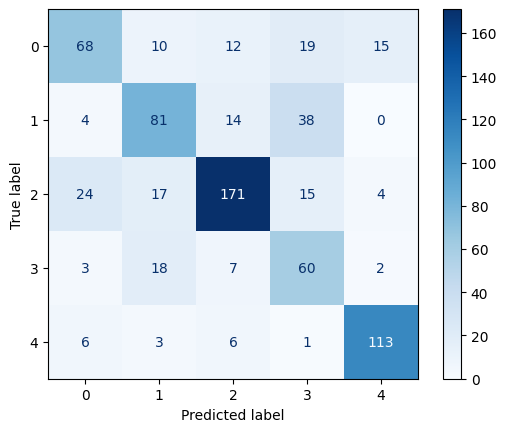

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test), digits=4))

36/36 [==============================] - 0s 587us/step
              precision    recall  f1-score   support

           0     0.6476    0.5484    0.5939       124
           1     0.6279    0.5912    0.6090       137
           2     0.8143    0.7403    0.7755       231
           3     0.4511    0.6667    0.5381        90
           4     0.8433    0.8760    0.8593       129

    accuracy                         0.6934       711
   macro avg     0.6768    0.6845    0.6752       711
weighted avg     0.7086    0.6934    0.6969       711



In [90]:
### Keras with Keras Hyperparameter

 Keras Hyperparameter tuning

In [91]:
import keras_tuner
# If you don't have keras_tuner installed, run the following in your terminal (mac), or anaconda prompt (windows)
# conda install -c conda-forge keras-tuner



from tensorflow import keras
from tensorflow.keras import layers

In [92]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    y_true = K.ones_like(y_true)
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)

In [93]:
def build_model(hp):
    model = keras.Sequential()

    # create input layer
    model.add(layers.Input(9))

    dropout = hp.Boolean("dropout") # generate a boolean variable called dropout whos value is randomly set to either True of False
    normalize = hp.Boolean("normalize") # generate a boolean variable called normalize whos value is randomly set to either True of False

    # create hidden layers
    for i in range(hp.Int(name='hidden_layer_count', min_value=1, max_value=5, step=1)):
        model.add(layers.Dense(units=hp.Int("units", min_value=32, max_value=1024, step=32),activation=hp.Choice("activation", ["selu", "elu", "relu", "tanh"]))) 
        if dropout:
            model.add(layers.Dropout(rate=hp.Float("dropout rate", min_value=0.01, max_value=0.1, step=.005)))
        if normalize:
            model.add(layers.Normalization())

    model.add(layers.Dense(units=5, activation="softmax"))

    # Define the optimizer learning rate as a hyperparameter.
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")   
    choice = hp.Choice(name='optimizer', values=['adam', 'sgd'])
    if 'adam' == choice:
        optimizer = keras.optimizers.legacy.Adam(learning_rate=lr)  # for M1/M2 use optimizers.legacy.Adam, otherwise use optimizers.Adam
    else:
        optimizer = keras.optimizers.legacy.SGD(learning_rate=lr)  # for M1/M2 use optimizers.legacy.SGD, otherwise use optimizers.SGD

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        # see here https://www.tensorflow.org/api_docs/python/tf/keras/losses
        
        # Though you can add a metric, this doesn't get used to train the model, it's only informative (see previous notebook for more detail).
        metrics=['accuracy', f1, recall, precision],  # you need to set this in order for keras_tuner to have one of these objectives!
        # for metrics, see https://www.tensorflow.org/api_docs/python/tf/keras/metrics/
    )
    return model

build_model(keras_tuner.HyperParameters())

In [94]:
import datetime
datestring = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")

In [95]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
# 
# You can use metrics other than accuracy, but you need to have this defined in the build model first
# For instance, if you have f1 defined in the build model, to have keras_tuner 'tune' on f1, you set objective to be 'val_f1'. 
# For precision you would have to have precision defined in the build model, and to tune on precision, you set the object to 
# be 'val_precision', etc.
# 
# Also, for custom objectives, you need to set a 'direction' for the tune... so if you want to maximize f1, you set direction to be 'max'.
# 
#    objective = keras_tuner.Objective("val_f1", direction="max"), 
  
    max_trials=150, # max_trials represents the number of hyperparameter combinations that will be tested by the tuner (like n_iter in sklearn random search)
    executions_per_trial=2, # max number of models to fit per set of set of hyperparameters combinations

    # the next three parameters about where the results from the training are stored
    directory=f'logs/{datestring:s}',
    project_name="keras_tuned",
    overwrite=True
)

In [96]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
dropout (Boolean)
{'default': False, 'conditions': []}
normalize (Boolean)
{'default': False, 'conditions': []}
hidden_layer_count (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'elu', 'relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [97]:
%%time
import time
from tensorflow.keras.callbacks import LambdaCallback
    
epoch_callback = LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print(f'Starting Epoch {epoch+1}!')
)

batch_loss_callback = LambdaCallback(
    on_batch_end=lambda batch,logs: print(f'\n After batch {batch}, the loss is {logs}.')
)
    
train_finish_callback = LambdaCallback(
    on_train_end=lambda logs: print('Training finished!')
)

tuner.search(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=200, 
    validation_data=(X_test, y_test), 
    callbacks=[epoch_callback, batch_loss_callback, train_finish_callback]
)

Trial 150 Complete [00h 00m 04s]
val_accuracy: 0.527426153421402

Best val_accuracy So Far: 0.6997186839580536
Total elapsed time: 00h 10m 44s
INFO:tensorflow:Oracle triggered exit
CPU times: total: 1h 23min 13s
Wall time: 10min 44s


In [98]:
tuner.results_summary()

Results summary
Results in logs/2023-04-13-18-28-55\keras_tuned
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 056 summary
Hyperparameters:
dropout: False
normalize: False
hidden_layer_count: 4
units: 416
activation: relu
lr: 0.001378263248778274
optimizer: adam
dropout rate: 0.04
Score: 0.6997186839580536

Trial 000 summary
Hyperparameters:
dropout: False
normalize: True
hidden_layer_count: 4
units: 448
activation: relu
lr: 0.0007104416318148381
optimizer: adam
Score: 0.6983122527599335

Trial 052 summary
Hyperparameters:
dropout: False
normalize: True
hidden_layer_count: 3
units: 224
activation: relu
lr: 0.005862125721808125
optimizer: adam
dropout rate: 0.060000000000000005
Score: 0.6983122229576111

Trial 061 summary
Hyperparameters:
dropout: True
normalize: False
hidden_layer_count: 3
units: 992
activation: relu
lr: 0.005227316838512897
optimizer: adam
dropout rate: 0.015
Score: 0.6969057619571686

Trial 140 summary
Hyperparameters:
dropout: True
nor

In [99]:
best_hps = tuner.get_best_hyperparameters(5)
best_hps[0].values

{'dropout': False,
 'normalize': False,
 'hidden_layer_count': 4,
 'units': 416,
 'activation': 'relu',
 'lr': 0.001378263248778274,
 'optimizer': 'adam',
 'dropout rate': 0.04}

In [100]:
# Get list of the top 2 models.
models = tuner.get_best_models(num_models=2)
# select the first one in the list (this is the best performing model)
best_model = models[0] # select the first one
# display summary of model training
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               4160      
                                                                 
 dense_1 (Dense)             (None, 416)               173472    
                                                                 
 dense_2 (Dense)             (None, 416)               173472    
                                                                 
 dense_3 (Dense)             (None, 416)               173472    
                                                                 
 dense_4 (Dense)             (None, 5)                 2085      
                                                                 
Total params: 526,661
Trainable params: 526,661
Non-trainable params: 0
_________________________________________________________________


In [101]:
(loss,accuracy,f1_score, precision, recall) = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss} Accuracy: {accuracy} F1 Score: {f1_score} Precision: {precision} Recall: {recall}")

23/23 [==============================] - 0s 1ms/step - loss: 0.9722 - accuracy: 0.7075 - f1: 0.9553 - recall: 0.9158 - precision: 1.0000
Loss: 0.972199022769928 Accuracy: 0.707454264163971 F1 Score: 0.9553139805793762 Precision: 0.91576087474823 Recall: 1.0


In [ ]:
import collections

[('Site_Id', 1)]
23/23 [==============================] - 0s 900us/step


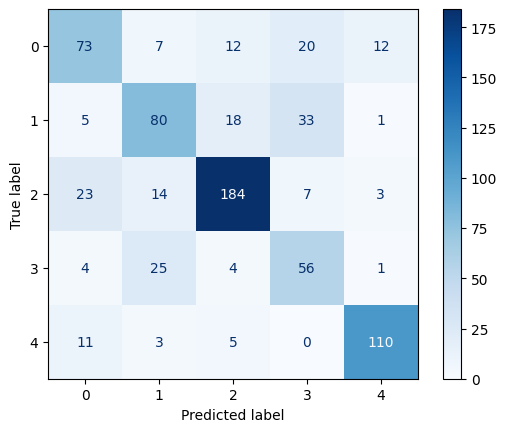

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))
      
# display the confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test).argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [105]:
print(classification_report(y_test, best_model.predict(X_test).argmax(axis=1)))

23/23 [==============================] - 0s 940us/step
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       124
           1       0.62      0.58      0.60       137
           2       0.83      0.80      0.81       231
           3       0.48      0.62      0.54        90
           4       0.87      0.85      0.86       129

    accuracy                           0.71       711
   macro avg       0.68      0.69      0.68       711
weighted avg       0.72      0.71      0.71       711



## For the above data we have fitted the following Neural networks
1. NN by using sklearn - (68% accuracy)
2. NN by using sklearn and using sklearn hyperparameter tuning - (72% accuracy) 
3. NN by using keras - (69% accuracy)
4. NN by using Kears and using sklearn Hyperparamerter tuning - (69.3% accuracy)
5. NN by using Keras and using Keras Hyperparameter tuning - (71%)

from the above Accuracy results we can say the the NN with sklearn and with the sklearn hyperparameter is the best fit model for the data.